Rømer and Light Travel Time Effects (ltte)
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.2 installed. (You can comment out this line if you don't use pip for your installation or don't want to update to the latest release).

In [ ]:
!pip install -I "phoebe>=2.2,<2.3"

As always, let's do imports and initialize a logger and a new Bundle.  See [Building a System](building_a_system.ipynb) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger('error')

b = phoebe.default_binary()

Now let's add a light curve dataset to see how ltte affects the timings of eclipses.

In [3]:
b.add_dataset('lc', times=phoebe.linspace(-0.05, 0.05, 51), dataset='lc01')

<ParameterSet: 43 parameters | contexts: figure, compute, dataset, constraint>

Relevant Parameters
------------------------

The 'ltte' parameter in context='compute' defines whether light travel time effects are taken into account or not.

In [4]:
print(b['ltte@compute'])

Parameter: ltte@phoebe01@compute
                       Qualifier: ltte
                     Description: Correct for light travel time effects
                           Value: False
                  Constrained by: 
                      Constrains: None
                      Related to: None



Comparing with and without ltte
--------------------------------------------

In order to have a binary system with any noticeable ltte effects, we'll set a somewhat extreme mass-ratio and semi-major axis.

In [5]:
b['sma@binary'] = 100

In [6]:
b['q'] = 0.1

We'll just ignore the fact that this will be a completely unphysical system since we'll leave the radii and temperatures alone despite somewhat ridiculous masses - but since the masses and radii disagree so much, we'll have to abandon atmospheres and use blackbody.

In [8]:
b.set_value_all('atm', 'blackbody')
b.set_value_all('ld_mode', 'manual')
b.set_value_all('ld_func', 'logarithmic')

In [9]:
b.run_compute(irrad_method='none', ltte=False, model='ltte_off')

<ParameterSet: 4 parameters | contexts: figure, model>

In [10]:
b.run_compute(irrad_method='none', ltte=True, model='ltte_on')

<ParameterSet: 4 parameters | contexts: figure, model>

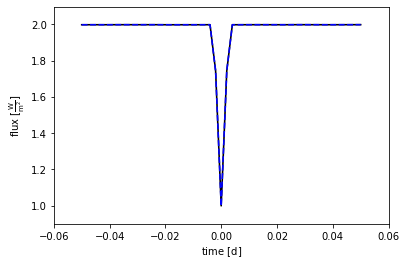

In [11]:
afig, mplfig = b.plot(show=True)